<a href="https://colab.research.google.com/github/supuni9622/Test-Google-Colab/blob/main/Music_Classification_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
cd /content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV1-Music

/content/drive/MyDrive/4th Year Research/M3/Test Implementation/Test-Google-Colab/TestV1-Music


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

In [10]:
# df = pd.read_csv('Music_DS_1.csv',encoding='cp1252')
df = pd.read_csv('Music_DS_6.csv',encoding='cp1252')
# df = df.dropna(how="any").reset_index(drop=True)
df = df.dropna(how="any").reset_index(drop=True)
# df.head()
df.head()

,Song_ID,Genre,Tempo (bpm),Loudness (db),Emotion
0,1,Pop,172,-4,Inspiration
1,2,Pop,92,-6,Sad
2,3,Pop,115,-7,Inspiration
3,4,Pop,117,-5,Inspiration
4,5,Pop,158,-6,Inspiration


In [11]:
possible_labels = df.Genre.unique()

label_dict = {}
for index, possible_label in enumerate(possible_labels):
    label_dict[possible_label] = index
label_dict

{'Ambient': 10,
 'Blues': 11,
 'Classical': 9,
 'Country': 1,
 'Disco': 6,
 'EDM': 3,
 'Hip hop': 4,
 'Jazz': 5,
 'Metal': 7,
 'Pop': 0,
 'Rock': 2,
 'Techno': 8}

In [12]:
df['Genre'] = df.Genre.replace(label_dict)

In [13]:
df.head()

,Song_ID,Genre,Tempo (bpm),Loudness (db),Emotion
0,1,0,172,-4,Inspiration
1,2,0,92,-6,Sad
2,3,0,115,-7,Inspiration
3,4,0,117,-5,Inspiration
4,5,0,158,-6,Inspiration


In [14]:
X = df.iloc[:, 1:4].values
Y = df.iloc[:, -1].values

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(Y)

In [16]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder="passthrough")
X = np.array(X)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [18]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

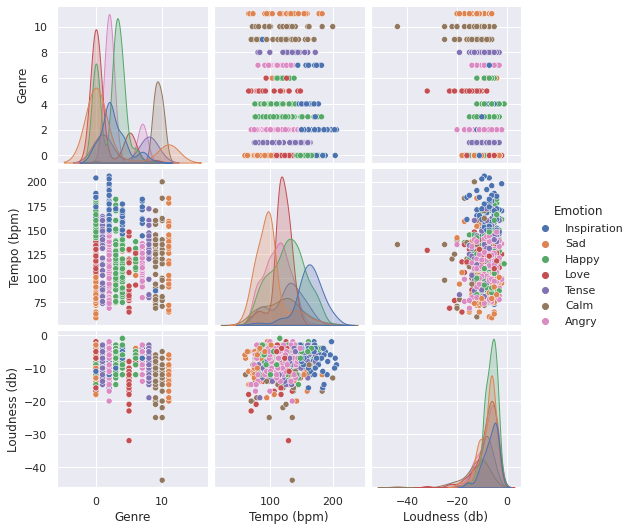

In [22]:
sns.set()
# sns.pairplot(df[['Genre', 'Acorsticness', 'Tempo (bpm)', 'Loudness (db)', 'Energy', 'Danceability', 'Valence', 'Key','Emotion' ]],
#              hue="Emotion", diag_kind="kde")
sns.pairplot(df[['Genre', 'Tempo (bpm)', 'Loudness (db)','Emotion' ]],
             hue="Emotion", diag_kind="kde")

# **Naive Bayes**

In [23]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

y_predNB = gnb.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predNB)
print(cm)
accuracy_score(y_test, y_predNB)

[[ 2  0  8  0  5  4  3]
 [ 0 14  0  0  0  0  0]
 [ 6  0 24  9  3  0  0]
 [ 0  0  3 10  0  1  1]
 [ 1  1  6  0 15  0  2]
 [ 1  8  1  0  5 14  0]
 [ 0  3  3  2  0  3  2]]


0.50625

In [25]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = gnb, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 51.56 %
Standard Deviation: 4.47 %


# **Logistic Regression**

In [28]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver = 'lbfgs',multi_class='auto')
logreg.fit(X_train,y_train)

y_pred = logreg.predict(X_test)

from sklearn.metrics import accuracy_score


acc1 = accuracy_score(y_test,y_pred)
acc1

0.5

In [29]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = logreg, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 44.53 %
Standard Deviation: 2.64 %


# **Decision Tree**

In [30]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_predDT = dt.predict(X_test)

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predDT)
print(cm)
accuracy_score(y_test, y_predDT)

[[22  0  0  0  0  0  0]
 [ 0 12  1  0  1  0  0]
 [ 0  0 38  2  1  1  0]
 [ 3  0  0 12  0  0  0]
 [ 0  1  3  2 19  0  0]
 [ 0  1  1  0  1 26  0]
 [ 0  0  0  0  0  0 13]]


0.8875

In [32]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = dt, X = X_train, y = y_train, cv = 6)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 88.12 %
Standard Deviation: 2.99 %


In [33]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion' : ['entropy','gini'], 'splitter' : ['best','random']}]
grid_search = GridSearchCV(estimator = dt,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 6,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 87.97 %
Best Parameters: {'criterion': 'entropy', 'splitter': 'best'}


# **Random Forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier
classifierRF = RandomForestClassifier(n_estimators = 150, criterion = 'entropy', random_state = 0)
classifierRF.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=150, random_state=0)

In [36]:
y_predRF = classifierRF.predict(X_test)

In [37]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predRF)
print(cm)
accuracy_score(y_test, y_predRF)

[[21  0  1  0  0  0  0]
 [ 0 13  1  0  0  0  0]
 [ 0  0 34  4  3  1  0]
 [ 2  0  0 12  0  0  1]
 [ 0  1  3  2 19  0  0]
 [ 0  1  2  0  0 26  0]
 [ 0  0  1  1  0  0 11]]


0.85

In [38]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierRF, X = X_train, y = y_train, cv = 6)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.22 %
Standard Deviation: 3.28 %


In [39]:
from sklearn.model_selection import GridSearchCV
parameters = [{'criterion' : ['entropy','gini'], 'n_estimators' : [10,50,80,100,200,250,300,500,1000]}]
grid_search = GridSearchCV(estimator = classifierRF,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 6,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 85.31 %
Best Parameters: {'criterion': 'entropy', 'n_estimators': 50}


# **K- Nearest Naighbor**

In [40]:
from sklearn.neighbors import KNeighborsClassifier
clfKNN = KNeighborsClassifier(n_neighbors=3,algorithm='ball_tree')

clfKNN.fit(X_train,y_train)
y_predKNN = clfKNN.predict(X_test)

In [41]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predKNN)
print(cm)
accuracy_score(y_test, y_predKNN)

[[20  0  1  1  0  0  0]
 [ 0 14  0  0  0  0  0]
 [ 1  0 33  4  2  0  2]
 [ 2  0  1  9  0  0  3]
 [ 0  1  4  2 18  0  0]
 [ 0  7  2  0  0 20  0]
 [ 5  2  1  1  0  0  4]]


0.7375

In [42]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clfKNN, X = X_train, y = y_train, cv = 6)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.70 %
Standard Deviation: 3.71 %


In [43]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors' : [2,3,4,5,6,7,8,9,10],'weights' : ['uniform', 'distance'], 'algorithm': ['auto', 'brute'],'metric' : ['minkowski'], 'p' : [2,3,4,5,6,7,8,9,10]},
              {'n_neighbors' : [2,3,4,5,6,7,8,9,10],'weights' : ['uniform', 'distance'], 'algorithm': ['ball_tree', 'kd_tree'], 'leaf_size':[20,30,40,50,60,70,80,90,100],'metric' : ['minkowski'], 'p' : [2,3,4,5,6,7,8,9,10]},
              {'n_neighbors' : [2,3,4,5,6,7,8,9,10], 'metric' : ['euclidean']},
              {'n_neighbors' : [2,3,4,5,6,7,8,9,10], 'metric' : ['manhattan']},
              {'n_neighbors' : [2,3,4,5,6,7,8,9,10], 'metric' : ['chebyshev']}
              ]
grid_search = GridSearchCV(estimator = clfKNN,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 6,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 80.32 %
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7}


# **Support Vector Machine**

In [47]:
from sklearn.svm import SVC

classifierSVM = SVC(C=50,kernel = 'rbf', gamma=5 )
classifierSVM.fit(X_train, y_train)

SVC(C=50, gamma=5)

In [49]:
y_predSVM = classifierSVM.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predSVM)
print(cm)
accuracy_score(y_test, y_predSVM)

[[20  0  2  0  0  0  0]
 [ 0  9  3  1  1  0  0]
 [ 0  0 31  5  4  1  1]
 [ 3  0  2  9  0  0  1]
 [ 0  0  2  2 21  0  0]
 [ 0  4  1  0  0 24  0]
 [ 1  2  0  1  0  0  9]]


0.76875

In [51]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierSVM, X = X_train, y = y_train, cv = 6)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 77.19 %
Standard Deviation: 2.96 %


In [52]:
from sklearn.svm import SVC
svc1 = SVC(C=50,kernel='rbf',gamma=1)     

svc1.fit(X_train,y_train)
y_pred4 = svc1.predict(X_test)

from sklearn.metrics import accuracy_score
acc4=    accuracy_score(y_test,y_pred4)
print(acc4)

rbf = SVC(kernel='rbf', gamma=0.5, C=0.1).fit(X_train, y_train)
poly = SVC(kernel='poly', degree=3, C=1).fit(X_train, y_train)

poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
acc5 = accuracy_score(y_test,poly_pred)
acc6 = accuracy_score(y_test,rbf_pred)
print(acc5)
print(acc6)


0.88125
0.53125
0.625


In [53]:
from sklearn.metrics import f1_score

poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
print('Accuracy (Polynomial Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (Polynomial Kernel): ', "%.2f" % (poly_f1*100))

Accuracy (Polynomial Kernel):  53.12
F1 (Polynomial Kernel):  49.00


In [54]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))

Accuracy (RBF Kernel):  62.50
F1 (RBF Kernel):  60.68


Applying Grid Search to find the best model and the best parameters

In [55]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [0.25, 0.5, 0.75, 1, 10], 'kernel': ['linear']},
              {'C': [0.25, 0.5, 0.75, 1, 10], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1,2,3,5]},
              {'C': [0.25, 0.5, 0.75, 1, 10], 'kernel': ['poly'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,1,2,3,5]}]
grid_search = GridSearchCV(estimator = classifierSVM,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 6,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 84.39 %
Best Parameters: {'C': 10, 'gamma': 0.7, 'kernel': 'rbf'}


# **XGBoost**

In [56]:
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [57]:
y_pred = classifier.predict(X_test)

In [58]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 91.25 %
Standard Deviation: 3.22 %


In [59]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[22  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0]
 [ 0  0 39  1  2  0  0]
 [ 3  0  0 12  0  0  0]
 [ 0  1  2  0 22  0  0]
 [ 0  1  2  0  0 26  0]
 [ 0  0  0  0  0  0 13]]


0.925

# **Ensemble Methods**

**Bagging Meta Estimater**

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
classifierBAG = BaggingClassifier(KNeighborsClassifier(),max_samples=0.6, max_features=0.2)
classifierBAG.fit(X_train, y_train)

BaggingClassifier(base_estimator=KNeighborsClassifier(), max_features=0.2,
                  max_samples=0.6)

In [61]:
y_predBAG = classifierBAG.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predBAG)
print(cm)
accuracy_score(y_test, y_predBAG)

[[19  0  0  0  1  2  0]
 [ 0 13  0  1  0  0  0]
 [ 0  0 33  5  3  1  0]
 [ 7  0  5  2  0  1  0]
 [ 0  1  3  0 21  0  0]
 [ 0  0  4  0  0 25  0]
 [ 0  0  0  1  0  1 11]]


0.775

In [64]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifierBAG, X = X_train, y = y_train, cv = 6)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.01 %
Standard Deviation: 8.01 %


**Extremely Randomized Trees**

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier

clfEDT = DecisionTreeClassifier(max_depth=10, min_samples_split=2,random_state=10)
scores = cross_val_score(clfEDT, X_train, y_train, cv=6)
scores.mean()

0.8781373067654147

In [66]:

clfERF = RandomForestClassifier(n_estimators=60, max_depth=None,min_samples_split=2, random_state=10)
scores = cross_val_score(clfERF, X_train, y_train, cv=10)
scores.mean()

0.846875

In [67]:
clfETC = ExtraTreesClassifier(n_estimators=40, max_depth=None,min_samples_split=6, random_state=10)
scores = cross_val_score(clfETC, X_train, y_train, cv=6)
scores.mean()

0.8890848174925057

**AdaBoost classifier with 100 weak learners**

In [74]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

clfAB = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(clfAB, X_train, y_train, cv=6)
scores.mean()

0.40144301416563805

**Gradient Tree Boosting**

In [75]:
from sklearn.ensemble import GradientBoostingClassifier

clfGTB = GradientBoostingClassifier(n_estimators=10, learning_rate=2.5,max_depth=None, random_state=42).fit(X_train, y_train)
scores = cross_val_score(clfGTB, X_train, y_train, cv=6)
scores.mean()

0.8671897960383236

**Voting Classifiers**

In [76]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

clfVLG = LogisticRegression(random_state=10)
clfVRF = RandomForestClassifier(n_estimators=50, random_state=10)
clfVNB = GaussianNB()

eclf1 = VotingClassifier(estimators=[('lr', clfVLG), ('rf', clfVRF), ('gnb', clfVNB)],voting='soft')

for clf, label in zip([clfVLG, clfVRF, clfVNB, eclf1], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
  scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=10)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.45 (+/- 0.03) [Logistic Regression]
Accuracy: 0.84 (+/- 0.04) [Random Forest]
Accuracy: 0.52 (+/- 0.04) [naive Bayes]
Accuracy: 0.76 (+/- 0.03) [Ensemble]


In [77]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

# Training classifiers
clf1 = DecisionTreeClassifier(max_depth=4)
clf2 = KNeighborsClassifier(n_neighbors=8)
clf3 = SVC(kernel='rbf', probability=True)
eclf2 = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],voting='soft', weights=[2, 1, 2])

clf1 = clf1.fit(X_train, y_train)
clf2 = clf2.fit(X_train, y_train)
clf3 = clf3.fit(X_train, y_train)
eclf2 = eclf2.fit(X_train, y_train)

for clf, label in zip([clf1, clf2, clf3, eclf2], ['DT', 'KNN', 'SVC', 'Ensemble']):
  scores = cross_val_score(clf, X_train, y_train, scoring='accuracy', cv=6)
  print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.77 (+/- 0.02) [DT]
Accuracy: 0.73 (+/- 0.02) [KNN]
Accuracy: 0.71 (+/- 0.03) [SVC]
Accuracy: 0.85 (+/- 0.02) [Ensemble]


In [78]:
from sklearn.model_selection import GridSearchCV
clf1 = LogisticRegression(random_state=10)
clf2 = RandomForestClassifier(random_state=10)
clf3 = GaussianNB()
eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)],voting='soft')

params = {'lr__C': [1.0, 100.0], 'rf__n_estimators': [20, 200]}

grid = GridSearchCV(estimator=eclf, param_grid=params, cv=10)
grid = grid.fit(X_train, y_train)
print("grid.best_score_", grid.best_score_)
grid.best_params_

grid.best_score_ 0.771875


{'lr__C': 1.0, 'rf__n_estimators': 200}

# **MLP Classifier**

In [99]:
from sklearn.neural_network import MLPClassifier

clfMLP = MLPClassifier(activation= 'tanh', alpha= 1e-05, hidden_layer_sizes= (500, 497), solver='adam', random_state=1)
clfMLP.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(activation='tanh', alpha=1e-05, hidden_layer_sizes=(500, 497),
              random_state=1)

In [100]:
y_predMLP = clfMLP.predict(X_test)

In [101]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predMLP)
print(cm)
accuracy_score(y_test, y_predMLP)

[[20  0  0  0  0  0  2]
 [ 0 13  0  0  0  0  1]
 [ 1  0 40  0  1  0  0]
 [ 2  0  1 11  0  0  1]
 [ 0  1  3  0 21  0  0]
 [ 0  5  2  0  0 22  0]
 [ 0  3  0  0  0  0 10]]


0.85625

In [102]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predMLP))

              precision    recall  f1-score   support

           0       0.87      0.91      0.89        22
           1       0.59      0.93      0.72        14
           2       0.87      0.95      0.91        42
           3       1.00      0.73      0.85        15
           4       0.95      0.84      0.89        25
           5       1.00      0.76      0.86        29
           6       0.71      0.77      0.74        13

    accuracy                           0.86       160
   macro avg       0.86      0.84      0.84       160
weighted avg       0.88      0.86      0.86       160



In [103]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = clfMLP, X = X_train, y = y_train, cv = 2)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Accuracy: 87.03 %
Standard Deviation: 2.97 %


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [85]:
from sklearn.model_selection import GridSearchCV
parameters = [{'solver': ['lbfgs', 'sgd', 'adam'], 'alpha' : [1e-5, 1e-6, 1e-4],'hidden_layer_sizes':[(5, 2), (100, 97), (200,197), (500, 497)], 'activation' : ['identity', 'logistic', 'tanh', 'relu']},]
grid_search = GridSearchCV(estimator = clfMLP,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 2,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 87.03 %
Best Parameters: {'activation': 'tanh', 'alpha': 1e-05, 'hidden_layer_sizes': (500, 497), 'solver': 'adam'}


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# ANN

In [86]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [94]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

# ann = tf.keras.models.Sequential()
# ann.add(tf.keras.layers.Dense(units=2, activation='relu'))
# ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
# ann.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
# ann.fit(X_train, y_train, batch_size = 64, epochs = 10)

model = Sequential()
model.add(Dense(20, input_dim=3, kernel_initializer='he_uniform', activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics = ["accuracy"])
model.summary()
# model.compile(loss='binary_crossentropy', optimizer='adam')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 20)                80        
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


In [95]:
model.fit(X_train, y_train, verbose=1, epochs=10)

Epoch 1/10
20/20 [==============================] - 0s 2ms/step - loss: -2.3170 - accuracy: 0.1156
Epoch 2/10
20/20 [==============================] - 0s 2ms/step - loss: -2.9668 - accuracy: 0.1109
Epoch 3/10
20/20 [==============================] - 0s 2ms/step - loss: -3.6137 - accuracy: 0.1063
Epoch 4/10
20/20 [==============================] - 0s 1ms/step - loss: -4.2753 - accuracy: 0.1000
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: -4.9438 - accuracy: 0.0797
Epoch 6/10
20/20 [==============================] - 0s 2ms/step - loss: -5.6424 - accuracy: 0.0719
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: -6.3617 - accuracy: 0.0719
Epoch 8/10
20/20 [==============================] - 0s 2ms/step - loss: -7.1325 - accuracy: 0.0734
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: -7.9060 - accuracy: 0.0734
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: -8.7459 - accuracy: 0.0734


In [96]:
score = model.evaluate(X_test, y_test,
                       batch_size=64, verbose=1)

3/3 [==============================] - 0s 4ms/step - loss: -9.5631 - accuracy: 0.0875
